In [1]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math



# PART 2 : Red-Black Trees

In [2]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self, tree): # added a variable
        #TODO
        if not self.left:
            return
        x = self.left

        if self.parent:
            if self.is_left_child():
                self.parent.left = x
            else:
                self.parent.right = x
        else:
            tree.root = x

        self.left = x.right
        x.right = self

        x.parent = self.parent
        self.parent = x

        #x.colour = self.colour
        self.make_red()
    
    def rotate_left(self, tree):
        #TODO
        if not self.right:
            return 
        
        x = self.right

        if self.parent:
            if self.is_left_child():
                self.parent.left = x
            else:
                self.parent.right = x
        else:
            tree.root = x

        self.right = x.left
        x.left = self

        x.parent = self.parent
        self.parent = x

        #x.colour = self.colour
        self.make_red()

In [3]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)

    def fix(self, node):
        #You may alter code in this method if you wish, it's merely a guide.
        if node.parent == None:
            node.make_black()
        while node != None and node.parent != None and node.parent.is_red(): 
            #TODO
            if not(node.parent.parent):
                break

            p = node.parent
            gp = p.parent
            u = node.get_uncle()

            if p.is_right_child(): # parent is right child
                if u and u.is_red(): # uncle is red
                    u.make_black()
                    p.make_black()
                    gp.make_red()
                    node = gp
                else: # uncle is black or does not exist
                    if node.is_left_child(): # node is left child
                        node = p
                        node.rotate_right(self)
                        #node.make_black()
                        #node.parent.make_red()
                        #node.parent = node.parent.rotate_left()
                        #node = node.parent.right
                    #else:
                        #node.parent.make_black()
                        #gp.make_red()
                        #gp = gp.rotate_left()
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    node.parent.parent.rotate_left(self)
            else: # parent is left child
                if u and u.is_red():
                    u.make_black()
                    p.make_black()
                    gp.make_red()
                    node = gp
                else: # uncle is black or does not exist
                    if node.is_right_child(): # node is right child
                        node = p
                        node.rotate_left(self)
                        #node.make_black()
                        #node.parent.make_red()
                        #node.parent = node.parent.rotate_right()
                        #node = node.parent.left
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    node.parent.parent.rotate_right(self)

        self.root.make_black()

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"

## Experiments

In [5]:
class BSTree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def add_node(self,value):
        if value >= self.value:
            if self.right is None:
                self.right = BSTree(value)
            else:
                self.right.add_node(value)
        else:
            if self.left is None:
                self.left = BSTree(value)
            else:
                self.left.add_node(value)
                
    def get_height(self):
        return self.__get_height(self)

    def __get_height(self, node):
        if node is None:
            return 0
        left_height = self.__get_height(node.left)
        right_height = self.__get_height(node.right)
        return 1 + max(left_height, right_height)
    
    def __str__(self):
        if self.is_leaf():
            return f"[{self.value}]"
        if self.left is None:
            return f"[{self.value} -> {self.__str_helper(self.right)}]"
        if self.right is None:
            return f"[{self.__str_helper(self.left)} <- {self.value}]"
        return f"[{self.__str_helper(self.left)} <- {self.value} -> {self.__str_helper(self.right)}]"

    def __str_helper(self, node):
        if node is None:
            return ""
        return str(node)
    
    def is_leaf(self):
        return self.left is None and self.right is None

In [6]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

In [7]:
def draw_2_graphs(y1, y2, title):
    x_values = [i for i in range(1,10)]
    plt.figure()
    plt.plot(x_values, y1[1:], label="BST", marker='o')
    plt.plot(x_values, y2[1:], label="RBT", marker='s')
    plt.xlabel('Iterations')
    plt.ylabel('Height')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
runs = 10

BST_height = []
RBT_height = []

for i in range(runs):
    my_list=create_custom_list(80,80)
    
    RBT = RBTree()
    RBT.insert(my_list[0])
    
    BST = BSTree(my_list[0])
    for node in my_list[1:]:
        RBT.insert(node)
        BST.add_node(node)
        
    BST_height.append(BST.get_height())
    RBT_height.append(RBT.get_height())
    
    
print("Average Height for Binary Search Tree :", sum(BST_height) / len(BST_height))
print("Average Height for Red Black Tree :", sum(RBT_height) / len(RBT_height))


draw_2_graphs(BST_height, RBT_height, "BST v/s RBT")

### Experiment Analysis
In this experiment, we aim to compare the performance of RBTs and BSTs by examining the difference in their heights when constructed from the same list of 10,000 elements. This would give us an good intution for comparing the performace of the two in comparison to using their run times as the time to search in a Tree is limited by the height of the tree, hence the resulting height difference allows us to evaluate which tree structure is more effective in minimizing search time. 

Observing the result from our plot we observe that the average height of RBTs is significantly smaller than that of BSTs. This indicates that RBTs offer better search performance, making them a preferable choice for applications where efficient searching is crucial.

Average Height for Binary Search Tree : 40.0
Average Height for Red Black Tree : 8.0


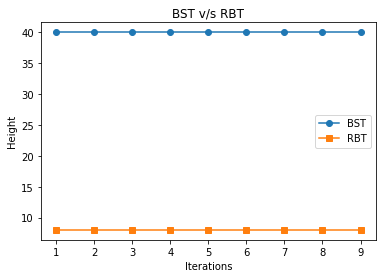

In [11]:
runs = 10

BST_height = []
RBT_height = []

for _ in range(runs):
    my_list=sorted(create_custom_list(40,40))
    
    RBT = RBTree()
    RBT.insert(my_list[0])
    
    BST = BSTree(my_list[0])
    for node in my_list[1:]:
        RBT.insert(node)
        BST.add_node(node)
        
    BST_height.append(BST.get_height())
    RBT_height.append(RBT.get_height())
    
    
print("Average Height for Binary Search Tree :", sum(BST_height) / len(BST_height))
print("Average Height for Red Black Tree :", sum(RBT_height) / len(RBT_height))


draw_2_graphs(BST_height, RBT_height, "BST v/s RBT")

### Experiment Analysis
inserting a sorted array leads to a linear structure where each new element is added to the right, resulting in a height equivalent to the number of elements. Conversely, the self-balancing nature of the RBT ensures a more uniform distribution of elements, significantly reducing the average height.

Hence RBT outperforms BST.

In [8]:
def create_near_sorted_list(length, max_value, sorted_level):
    sorted_length = math.ceil(length * sorted_level) #sorted_level from 0 to 1, 0 being completely random, 1 being completely sorted
    rand_length = (length - sorted_length)
    mylist = create_custom_list(sorted_length, max_value)
    mylist = sorted(mylist) 
    rand = create_custom_list(rand_length, max_value)
    return(mylist + rand)

Average Height for Binary Search Tree : 12.363636363636363
Average Height for Red Black Tree : 7.0


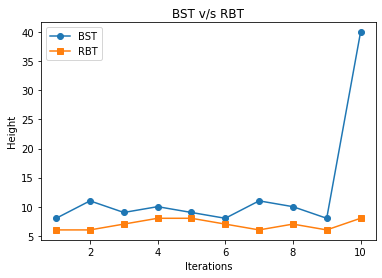

In [10]:
def draw_2_graphs(y1, y2, title):
    x_values = [i for i in range(1,11)]
    plt.figure()
    plt.plot(x_values, y1[1:], label="BST", marker='o')
    plt.plot(x_values, y2[1:], label="RBT", marker='s')
    plt.xlabel('Sortedness (decreases ->)')
    plt.ylabel('Height')
    plt.title(title)
    plt.legend()
    plt.show()

runs = 10

BST_height = []
RBT_height = []

for run in range(runs + 1):
    my_list=create_near_sorted_list(40,40, (run // 10))
    
    RBT = RBTree()
    RBT.insert(my_list[0])
    
    BST = BSTree(my_list[0])
    for node in my_list[1:]:
        RBT.insert(node)
        BST.add_node(node)
        
    BST_height.append(BST.get_height())
    RBT_height.append(RBT.get_height())
    
    
print("Average Height for Binary Search Tree :", sum(BST_height) / len(BST_height))
print("Average Height for Red Black Tree :", sum(RBT_height) / len(RBT_height))


draw_2_graphs(BST_height, RBT_height, "BST v/s RBT")

### Experiment Analysis

RBTs outperform BSTs due to their ability to balance height, ensuring even distribution of nodes. BSTs tend to lean to its right when nodes are inserted in ascending order, especially as randomness increases. By creating different versions of the list with varying levels of "unsortedness" using pythons build in sorted() function, we observed how sorting order impacts tree height. As the degree of sortedness decreased (to the right of the graph), BSTs displayed notably taller heights compared to RBTs, illustrating the influence of sorting order on tree height.
In the end when the level of sortedness becames 0, we notice that the height of the tree = number of elements inserted.

## PART 2 : Binary Search

In [181]:
class DynamicBinarySearch:
    def __init__(self, L):
        self.length = len(L)
        self.k = math.ceil(math.log2(self.length + 1))  # Number of bits needed to represent n
        self.arrays = [[] for _ in range(self.k)]  # Initialize arrays
        self.memo = {} # Adding memoization for optimization
        
        
        binary = bin(self.length)[2:]
        index = 0
        for i in range(self.k):
            if binary[i] == '1':
                self.arrays[i] = sorted(L[index:index + 2**i])
                index += 2**i                    
    
    def binary_search(self, item_list, to_find, lower, upper):
        if lower == upper:
            if item_list[lower] >= to_find:
                return lower
            else:
                return lower+1
         
        if lower > upper:
            return lower

        mid = (lower+upper)//2

        if item_list[mid]< to_find:
            return self.binary_search(item_list,to_find, mid+1, upper)
        elif item_list[mid]> to_find:
            return self.binary_search(item_list,to_find, lower, mid-1)
        else:
            return mid
        
    def find_array(self, to_find):
        # Find the sub array to which the element belongs
        for i in range(self.k):
            if self.arrays[i] and self.arrays[i][-1] >= to_find:   # We are checking if the sub array is not empty or the largest element in the sub array is less than the searched element
                return i
            
        return -1  # Return -1 if the element doesn't belong to any array
    
    def search(self, to_find):
        if to_find in self.memo.keys():
            return self.memo[to_find]

        index = self.find_array(to_find)
        if index != -1: 
            element_index = self.binary_search(self.arrays[index], to_find, 0, len(self.arrays[index]) - 1)
            self.memo[to_find] = True
            return self.arrays[index][element_index] == to_find
        return False  
    
    def insert(self, to_insert):
        # Find the sub array needed to be appended 
        index = self.find_array(to_insert) 
        if index != -1: 
            element_index = self.binary_search(self.arrays[index], to_insert, 0, len(self.arrays[index]) - 1) # Returns the index of element, if element is not present then binary_search function will return the index where the element should be inserted to maintain the sorted order.
            self.arrays[index] = self.arrays[index][0:element_index] + [to_insert] + self.arrays[index][element_index:]
        else:
            self.arrays[index] = self.arrays[index] + [to_insert]
    
    
    def delete(self, to_delete):
        if self.search(to_delete):
            index = self.find_array(to_delete) 
            element_index = self.binary_search(self.arrays[index], to_delete,0, len(self.arrays[index]))  
            
            self.arrays[index] = self.arrays[index][0:element_index] + self.arrays[index][element_index + 1:]
            
    def __str__(self):
        final = []
        for i in range(self.k):
            final += self.arrays[i]   
            
        return str(final)


#### Dynamic Binary Search:
Dynamic programming involves breaking down a complex problem into smaller subproblems, solving each subproblem only once, and then using the solutions of the subproblems to build the solution for the original problem.

In our implementation of DynamicBinarySearch, the dynamic programming aspect comes into play through memoization and optimization.

The dynamic binary search's time complexity is determined by the size of the array, and the number of subarrays it divides into, denoted by \( k \), which is ceil(log_2(n + 1)). The search within each subarray has a time complexity of O(log n_k), where \( n_k \) is the size of the subarray. Therefore, the total time complexity for dynamic binary search is **O(k + log(n_k))**.

In [97]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [98]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [162]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

In [167]:
def binary_search4(item_list, to_find,lower,upper):

    if lower == upper:
        if item_list[lower] > to_find:
            return lower
        else:
            return lower+1
         
    if lower > upper:
        return lower
    
    mid = (lower+upper)//2

    if item_list[mid]< to_find:
        return binary_search4(item_list,to_find, mid+1, upper)
    elif item_list[mid]> to_find:
        return binary_search4(item_list,to_find, lower, mid-1)
    else:
        return mid


#### Traditional Binary Search:
The time complexity of traditional binary search on an array of length \( n \) is \( O(log n) \).

### Experiments

In [175]:
def draw_5_graphs(y1, y2, y3, y4, y5, title):
    x_values = [i for i in range(1, 20)]
    plt.figure()
    plt.plot(x_values, y1[1:], label="DYNAMIC", marker='o')
    plt.plot(x_values, y2[1:], label="BS1", marker='s')
    plt.plot(x_values, y3[1:], label="BS2", marker='^')
    plt.plot(x_values, y4[1:], label="BS3", marker='D')
    plt.plot(x_values, y5[1:], label="BS4", marker='x')
    plt.xlabel('Iterations')
    plt.ylabel('Run Times')
    plt.title(title)
    plt.legend()
    plt.show()

3.6099983844906093e-06
6.3899991801008586e-06
4.954999894835055e-06
4.98000081279315e-06
7.445000665029511e-06


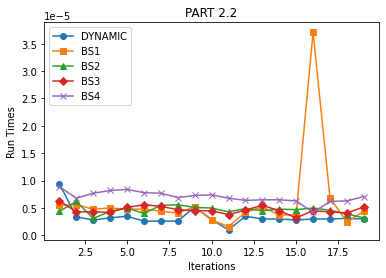

In [219]:
runs = 20

dynamic = []
my_list1=sorted(create_custom_list(1000,1000))
DBS = DynamicBinarySearch(my_list1)

for _ in range(runs):
    random_item = random.choice(my_list1)
    start = timeit.default_timer()
    DBS.search(random_item)
    stop = timeit.default_timer()
    dynamic.append(stop-start)

BS1 = []
my_list2=sorted(create_custom_list(1000,1000))

for _ in range(runs):
    random_item = random.choice(my_list2)
    start = timeit.default_timer()
    binary_search_1(my_list2, random_item)
    stop = timeit.default_timer()
    BS1.append(stop-start)

BS2 = []
my_list3=sorted(create_custom_list(1000,1000))

for _ in range(runs):
    random_item = random.choice(my_list3)
    start = timeit.default_timer()
    binary_search_2(my_list3, random_item)
    stop = timeit.default_timer()
    BS2.append(stop-start)
    
BS3 = []
my_list4=sorted(create_custom_list(1000,1000))

for _ in range(runs):
    random_item = random.choice(my_list4)
    start = timeit.default_timer()
    binary_search_3(my_list3, random_item)
    stop = timeit.default_timer()
    BS3.append(stop-start)

BS4 = []
my_list5=sorted(create_custom_list(1000,1000))

for _ in range(runs):
    random_item = random.choice(my_list5)
    start = timeit.default_timer()
    binary_search4(my_list3, random_item,0, len(my_list3) - 1)
    stop = timeit.default_timer()
    BS4.append(stop-start)


print(sum(dynamic) / len(dynamic))
print(sum(BS1) / len(BS1))
print(sum(BS2) / len(BS1))
print(sum(BS3) / len(BS3))
print(sum(BS4) / len(BS4))

draw_5_graphs(dynamic, BS1, BS2, BS3, BS4, "PART 2.2")


#### Experiment Description :
In our experiment, we conduct a comparative analysis of different binary search implementations by searching for a randomly selected element within a sorted list. The experiment is repeated for 20 iterations, each time measuring the runtime (by the difference of start time and end time) of the binary search implementation. We then plot this runtime for each implementation againts its iterations.
We choose our list to have 1000 elements as the list would be sufficiently large to provide a meaningful analysis then.

### Observations :
In certain cases dynamic binary search outperforms traditional binary search, while in some cases it's performance is worse.

Reasons on why dynamic binary search outperforms :
- By partitioning the array into smaller subarrays, dynamic binary search reduces the search space for each element. 
- The use of memoization, caching the results of previous searches, enhances performance by avoiding redundant computations.

Reasons on why traditional binary search could perfrom better : 
- In scenarios where the array size is relatively small, the overhead of dividing the array into subarrays may outweigh the benefits of reduced search space.
- Dynamic Binary search's power depends on the binary representation of the number of elements to fill up its subarrays this may  cause certain subarrays may remain largely empty, reducing the effectiveness of the approach.

Dynamic Binary search may be considered overkill in scenarios where the list size is relatively small, since the overhead associated with maintaining the dynamic structure, may outweigh the benefits gained from the dynamic approach.